<a href="https://colab.research.google.com/github/imrazack-cisco/bits/blob/main/Matrix_Decomposition_In_Action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

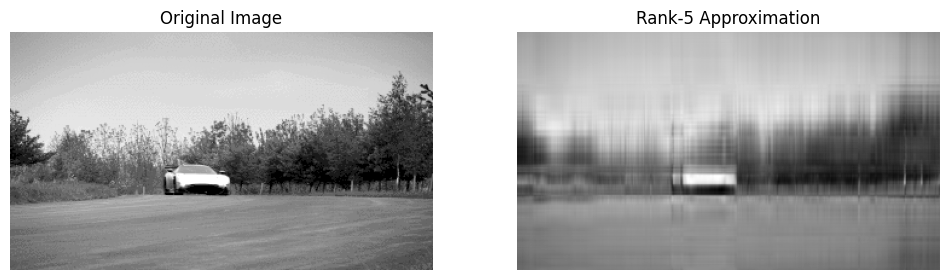

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

def download_image(image_url):
    """Downloads an image from a URL and returns the PIL Image object."""
    try:
        response = requests.get(image_url, stream=True)
        response.raise_for_status()
        image = Image.open(BytesIO(response.content))
        return image
    except requests.exceptions.RequestException as e:
        print(f"Error fetching image: {e}")
        return None
    except (IOError, UnidentifiedImageError) as e:
        print(f"Error opening or processing image: {e}")
        return None

def reconstruct_image(U, Sigma, Vt, k):
    """Reconstruct image using rank-k approximation."""
    return np.dot(U[:, :k], np.dot(np.diag(Sigma[:k]), Vt[:k, :]))

# Image URL
image_url = "https://www.easygifanimator.net/images/samples/video-to-gif-sample.gif"

# Download the image
image = download_image(image_url)

if image is not None:
    # Convert to grayscale and get the image matrix
    image_gray = image.convert('L')
    image_matrix = np.array(image_gray)

    # Perform SVD
    U, Sigma, Vt = np.linalg.svd(image_matrix, full_matrices=False)

    # Rank for approximation
    k = 5

    # Reconstruct the image
    approx_image = reconstruct_image(U, Sigma, Vt, k)

    # Plot original and approximated images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image_matrix, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'Rank-{k} Approximation')
    plt.imshow(approx_image, cmap='gray')
    plt.axis('off')

    plt.show()
else:
    print("Image download failed.")